In [1]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import he_normal
import segmentation_models as sm
import h5py 
import numpy as np
import matplotlib.pyplot as plt

Segmentation Models: using `keras` framework.


In [2]:
# def standard_unit(input_tensor, stage, nb_filter):
#     x = Conv2D(nb_filter, (3, 3), 
#                padding='same',
#                kernel_initializer=he_normal(),
#                kernel_regularizer=l2(1e-4),
#                name=f'conv{stage}_1')(input_tensor)
#     x = BatchNormalization(name=f'bn{stage}_1')(x)
#     x = Activation('relu', name=f'act{stage}_1')(x)
    
#     x = Conv2D(nb_filter, (3, 3),
#                padding='same',
#                kernel_initializer=he_normal(),
#                kernel_regularizer=l2(1e-4),
#                name=f'conv{stage}_2')(x)
#     x = BatchNormalization(name=f'bn{stage}_2')(x)
#     x = Activation('relu', name=f'act{stage}_2')(x)
#     return x

In [3]:
# def unetpp(num_class=1):
#     nb_filter = [32, 64, 128, 256, 512]
#     bn_axis = 3
#     img_input = Input(shape=(288, 384, 3), name='main_input')

#     # ===================== 完整编码路径 =====================
#     # Stage 1
#     conv1_1 = standard_unit(img_input, stage='11', nb_filter=nb_filter[0])
#     pool1 = MaxPooling2D((2, 2), name='pool1')(conv1_1)

#     # Stage 2
#     conv2_1 = standard_unit(pool1, stage='21', nb_filter=nb_filter[1])
#     pool2 = MaxPooling2D((2, 2), name='pool2')(conv2_1)

#     # ===================== 中间解码路径（补充缺失部分） =====================
#     # 生成 conv1_2（第一次跳跃连接）
#     up1_2 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up12')(conv2_1)
#     conv1_2 = concatenate([up1_2, conv1_1], axis=bn_axis, name='merge12')
#     conv1_2 = standard_unit(conv1_2, stage='12', nb_filter=nb_filter[0])

#     # Stage 3
#     conv3_1 = standard_unit(pool2, stage='31', nb_filter=nb_filter[2])
#     pool3 = MaxPooling2D((2, 2), name='pool3')(conv3_1)

#     # 生成 conv1_3（第二次跳跃连接）
#     up2_2 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up22')(conv3_1)
#     conv2_2 = concatenate([up2_2, conv2_1], axis=bn_axis, name='merge22')
#     conv2_2 = standard_unit(conv2_2, stage='22', nb_filter=nb_filter[1])

#     up1_3 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up13')(conv2_2)
#     conv1_3 = concatenate([up1_3, conv1_1, conv1_2], axis=bn_axis, name='merge13')
#     conv1_3 = standard_unit(conv1_3, stage='13', nb_filter=nb_filter[0])

#     # ===================== 后续完整结构 =====================
#     # Stage 4
#     conv4_1 = standard_unit(pool3, stage='41', nb_filter=nb_filter[3])
#     pool4 = MaxPooling2D((2, 2), name='pool4')(conv4_1)

#     # 桥接层
#     conv5_1 = standard_unit(pool4, stage='51', nb_filter=nb_filter[4])

#     # 生成 conv1_4（第三次跳跃连接）
#     up3_2 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2), name='up32')(conv4_1)
#     conv3_2 = concatenate([up3_2, conv3_1], axis=bn_axis, name='merge32')
#     conv3_2 = standard_unit(conv3_2, stage='32', nb_filter=nb_filter[2])

#     up2_3 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up23')(conv3_2)
#     conv2_3 = concatenate([up2_3, conv2_1, conv2_2], axis=bn_axis, name='merge23')
#     conv2_3 = standard_unit(conv2_3, stage='23', nb_filter=nb_filter[1])

#     up1_4 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up14')(conv2_3)
#     conv1_4 = concatenate([up1_4, conv1_1, conv1_2, conv1_3], axis=bn_axis, name='merge14')
#     conv1_4 = standard_unit(conv1_4, stage='14', nb_filter=nb_filter[0])

#     # ===================== 最终解码路径 =====================
#     up4_2 = Conv2DTranspose(nb_filter[3], (2, 2), strides=(2, 2), name='up42')(conv5_1)
#     conv4_2 = concatenate([up4_2, conv4_1], axis=bn_axis, name='merge42')
#     conv4_2 = standard_unit(conv4_2, stage='42', nb_filter=nb_filter[3])

#     up3_3 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2), name='up33')(conv4_2)
#     conv3_3 = concatenate([up3_3, conv3_1, conv3_2], axis=bn_axis, name='merge33')
#     conv3_3 = standard_unit(conv3_3, stage='33', nb_filter=nb_filter[2])

#     up2_4 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up24')(conv3_3)
#     conv2_4 = concatenate([up2_4, conv2_1, conv2_2, conv2_3], axis=bn_axis, name='merge24')
#     conv2_4 = standard_unit(conv2_4, stage='24', nb_filter=nb_filter[1])

#     up1_5 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up15')(conv2_4)
#     conv1_5 = concatenate([up1_5, conv1_1, conv1_2, conv1_3, conv1_4], axis=bn_axis, name='merge15')
#     conv1_5 = standard_unit(conv1_5, stage='15', nb_filter=nb_filter[0])

#     # ===================== 输出层 =====================
#     nestnet_output_1 = Conv2D(num_class, (1, 1), 
#                             activation='sigmoid',
#                             name='output_1',
#                             kernel_initializer=he_normal(),
#                             padding='same',
#                             kernel_regularizer=l2(1e-4))(conv1_2)
    
#     nestnet_output_2 = Conv2D(num_class, (1, 1),
#                             activation='sigmoid',
#                             name='output_2',
#                             kernel_initializer=he_normal(),
#                             padding='same',
#                             kernel_regularizer=l2(1e-4))(conv1_3)
    
#     nestnet_output_3 = Conv2D(num_class, (1, 1),
#                             activation='sigmoid',
#                             name='output_3',
#                             kernel_initializer=he_normal(),
#                             padding='same',
#                             kernel_regularizer=l2(1e-4))(conv1_4)
    
#     nestnet_output_4 = Conv2D(num_class, (1, 1),
#                             activation='sigmoid',
#                             name='output_4',
#                             kernel_initializer=he_normal(),
#                             padding='same',
#                             kernel_regularizer=l2(1e-4))(conv1_5)

#     model = Model(inputs=img_input, 
#                 outputs=[nestnet_output_1, nestnet_output_2,
#                         nestnet_output_3, nestnet_output_4])
    
#     return model

In [4]:
def standard_unit(input_tensor, stage, nb_filter, kernel_size=3):
    """原始U-Net++的标准卷积单元（包含BN和ReLU）"""
    x = Conv2D(nb_filter, (kernel_size, kernel_size), 
               activation='relu', 
               name='conv'+stage+'_1', 
               kernel_initializer='he_normal', 
               padding='same', 
               kernel_regularizer=l2(1e-4))(input_tensor)
    x = BatchNormalization(name='bn'+stage)(x)
    x = Conv2D(nb_filter, (kernel_size, kernel_size), 
               activation='relu',
               name='conv'+stage+'_2', 
               kernel_initializer='he_normal', 
               padding='same', 
               kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization(name='bn'+stage+'_2')(x)
    return x

def unetpp(num_class=1):  # 论文默认启用深度监督
    print('原始U-Net++（2018 CVPR版本）')
    nb_filter = [32, 64, 128, 256, 512]
    
    # 输入层
    img_input = Input(shape=(288, 384, 3), name='main_input')

    # ----------- 编码器路径 -----------
    # Block 1 (X00)
    x1_1 = standard_unit(img_input, stage='11', nb_filter=nb_filter[0])
    pool1 = MaxPooling2D((2, 2), name='pool1')(x1_1)

    # Block 2 (X10)
    x2_1 = standard_unit(pool1, stage='21', nb_filter=nb_filter[1])
    pool2 = MaxPooling2D((2, 2), name='pool2')(x2_1)

    # Block 3 (X20)
    x3_1 = standard_unit(pool2, stage='31', nb_filter=nb_filter[2])
    pool3 = MaxPooling2D((2, 2), name='pool3')(x3_1)

    # Block 4 (X30)
    x4_1 = standard_unit(pool3, stage='41', nb_filter=nb_filter[3])
    pool4 = MaxPooling2D((2, 2), name='pool4')(x4_1)

    # ----------- 瓶颈层 -----------
    x5_1 = standard_unit(pool4, stage='51', nb_filter=nb_filter[4])

    # ----------- 解码器路径（密集跳跃连接）-----------
    # Block 5 (X01)
    x1_2 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up12', padding='same')(x2_1)
    x1_2 = concatenate([x1_2, x1_1], name='merge12')
    x1_2 = standard_unit(x1_2, stage='12', nb_filter=nb_filter[0])

    # Block 6 (X11)
    x2_2 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up22', padding='same')(x3_1)
    x2_2 = concatenate([x2_2, x2_1], name='merge22')
    x2_2 = standard_unit(x2_2, stage='22', nb_filter=nb_filter[1])

    # Block 7 (X02)
    x1_3 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up13', padding='same')(x2_2)
    x1_3 = concatenate([x1_3, x1_1, x1_2], name='merge13')
    x1_3 = standard_unit(x1_3, stage='13', nb_filter=nb_filter[0])

    # 继续构建完整结构...
    # Block 8 (X21)
    x3_2 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2), name='up32', padding='same')(x4_1)
    x3_2 = concatenate([x3_2, x3_1], name='merge32')
    x3_2 = standard_unit(x3_2, stage='32', nb_filter=nb_filter[2])

    # Block 9 (X12)
    x2_3 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up23', padding='same')(x3_2)
    x2_3 = concatenate([x2_3, x2_1, x2_2], name='merge23')
    x2_3 = standard_unit(x2_3, stage='23', nb_filter=nb_filter[1])

    # Block 10 (X03)
    x1_4 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up14', padding='same')(x2_3)
    x1_4 = concatenate([x1_4, x1_1, x1_2, x1_3], name='merge14')
    x1_4 = standard_unit(x1_4, stage='14', nb_filter=nb_filter[0])

    # ----------- 最深层的上采样路径 -----------
    # Block 11 (X31)
    x4_2 = Conv2DTranspose(nb_filter[3], (2, 2), strides=(2, 2), name='up42', padding='same')(x5_1)
    x4_2 = concatenate([x4_2, x4_1], name='merge42')
    x4_2 = standard_unit(x4_2, stage='42', nb_filter=nb_filter[3])

    # Block 12 (X22)
    x3_3 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2), name='up33', padding='same')(x4_2)
    x3_3 = concatenate([x3_3, x3_1, x3_2], name='merge33')
    x3_3 = standard_unit(x3_3, stage='33', nb_filter=nb_filter[2])

    # Block 13 (X13)
    x2_4 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up24', padding='same')(x3_3)
    x2_4 = concatenate([x2_4, x2_1, x2_2, x2_3], name='merge24')
    x2_4 = standard_unit(x2_4, stage='24', nb_filter=nb_filter[1])

    # Block 14 (X04)
    x1_5 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up15', padding='same')(x2_4)
    x1_5 = concatenate([x1_5, x1_1, x1_2, x1_3, x1_4], name='merge15')
    x1_5 = standard_unit(x1_5, stage='15', nb_filter=nb_filter[0])

    # ----------- 输出层 -----------
    output1 = Conv2D(num_class, (1, 1), activation='sigmoid', name='output1')(x1_2)
    output2 = Conv2D(num_class, (1, 1), activation='sigmoid', name='output2')(x1_3)
    output3 = Conv2D(num_class, (1, 1), activation='sigmoid', name='output3')(x1_4)
    output4 = Conv2D(num_class, (1, 1), activation='sigmoid', name='output4')(x1_5)

#     model = Model(inputs=img_input, outputs=[output1, output2, output3, output4])
    model = Model(inputs=img_input, outputs=output4)
    return model

In [5]:
# 验证模型
model = unetpp(num_class=1)
model.summary()

原始U-Net++（2018 CVPR版本）
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 288, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv11_1 (Conv2D)              (None, 288, 384, 32  896         ['main_input[0][0]']             
                                )                                                                 
                                                                                                  
 bn11 (BatchNormalization)      (None, 288, 384, 32  128         ['conv11_1[0][0]']               
                                )                                      

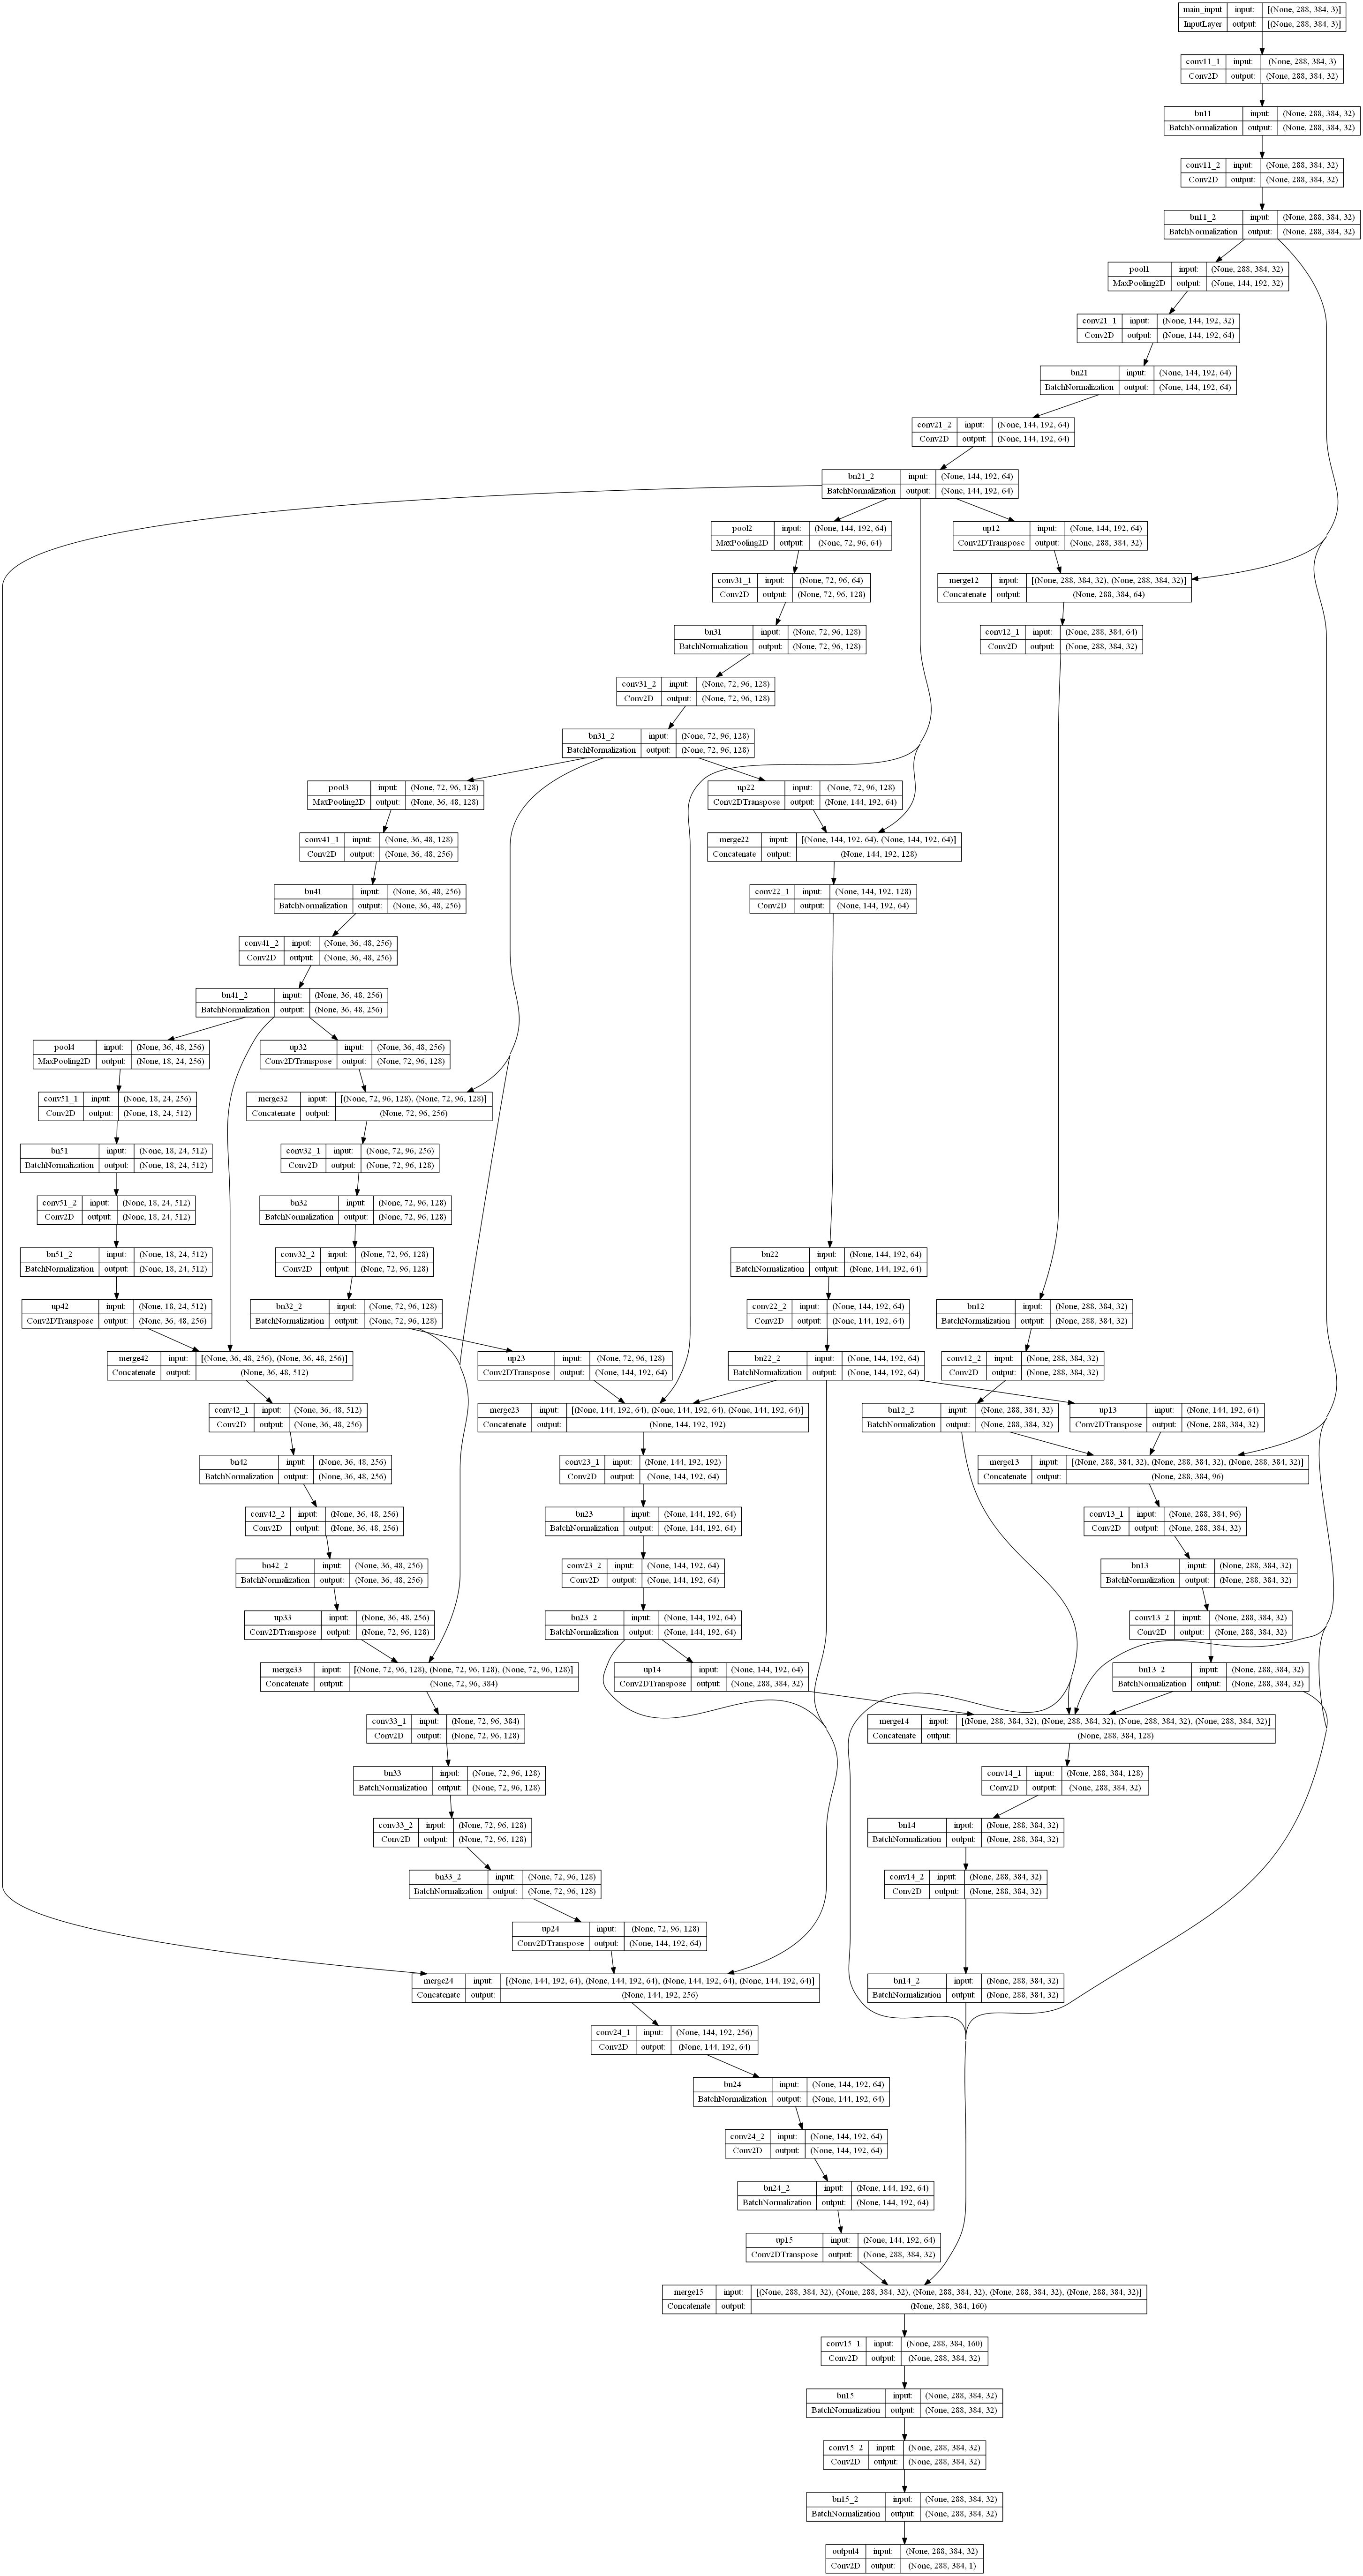

In [6]:
# # 可视化模型结构（需要graphviz）
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='unetpp.png')

In [7]:
# 读取训练集
fh5 = h5py.File(r'E:\wujieyu\img train PolypGen+CVC\img Highlights processing FMM\imgandmasks_Highlights_processing_percentile=99.5.h5','r')
img_png_x = fh5['img']
img_png_x = np.array(img_png_x)
mask_x = fh5['masks']
mask_x = np.array(mask_x)

In [5]:
img_png_x.shape

(380, 288, 384, 3)

In [6]:
img_png_x.max()

1.0

In [7]:
mask_x.shape

(380, 288, 384)

In [8]:
mask_x.max()

255.0

In [11]:
mask_x = mask_x/255

In [12]:
mask_x.max()

1.0

In [14]:
# 划分训练集与验证集
# 划分训练集与验证集
# 划分训练集与验证集
# T_img_png_x
# T_mask_x
# V_img
# V_mask

In [15]:
# -----------------------------------------------------------------
# 从txt文件读取并恢复为NumPy数组
# -----------------------------------------------------------------
# 读取训练集
# Train = np.loadtxt('E:\wujieyu\img train PolypGen+CVC\Train.txt', dtype=int)
Train = np.loadtxt('D:\edge\Train.txt', dtype=int)
# 读取验证集
# Val = np.loadtxt('E:\wujieyu\img train PolypGen+CVC\Val.txt', dtype=int)
Val = np.loadtxt('D:\edge\Val.txt', dtype=int)

In [16]:
# -----------------------------------------------------------------
# 按索引划分图像数据
# -----------------------------------------------------------------
# 划分训练集（T_img_png_x）和验证集（V_img）
T_img = img_png_x[Train]
V_img = img_png_x[Val]
T_mask = mask_x[Train]
V_mask = mask_x[Val]

In [17]:
print(  T_img.shape,
        V_img.shape,
        T_mask.shape,
        V_mask.shape)

(2390, 288, 384, 3) (597, 288, 384, 3) (2390, 288, 384) (597, 288, 384)


(-0.5, 383.5, 287.5, -0.5)

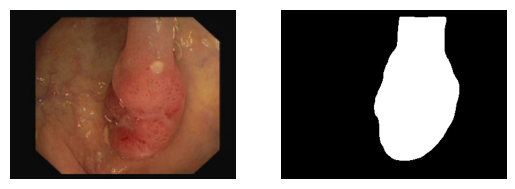

In [18]:
# 查看训练集集
a = 10
plt.figure()
plt.subplot(121),plt.imshow(T_img[a])
plt.axis('off')
plt.subplot(122),plt.imshow(T_mask[a],'gray')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

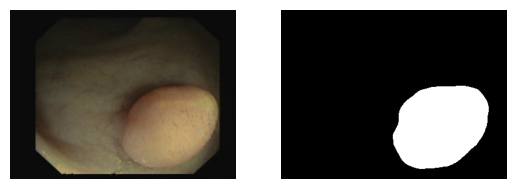

In [19]:
# 查看验证集
a = 10
plt.figure()
plt.subplot(121),plt.imshow(V_img[a])
plt.axis('off')
plt.subplot(122),plt.imshow(V_mask[a],'gray')
plt.axis('off')

In [57]:
import tensorflow as tf

def bce_jaccard_loss(y_true, y_pred, smooth=1e-7, alpha=0.5):
    """
    参数说明：
    - y_true: 真实标签 (shape=[batch, H, W, 1])
    - y_pred: 模型预测值 (shape=[batch, H, W, 1])
    - smooth: 防止除零的小常数
    - alpha: 平衡 BCE 和 Jaccard 的权重（默认 0.5）
    """
    # 计算二元交叉熵
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    
    # 计算 Jaccard Loss (IoU Loss)  
    y_true_f = tf.keras.backend.flatten(y_true)   # 展平为向量 [batch*H*W]
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f + y_pred_f) - intersection
    jaccard = (intersection + smooth) / (union + smooth)
    jaccard_loss = 1 - jaccard  # 将 IoU 转换为 Loss
    
    # 加权组合
    return alpha * bce + (1 - alpha) * jaccard_loss

In [58]:
def dice_score(y_true, y_pred, smooth=1e-7):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    denominator = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)
    return (2.0 * intersection + smooth) / (denominator + smooth)

In [59]:
def iou_score(y_true, y_pred, smooth=1e-7):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

In [60]:
model.compile(
    optimizer='Adam',
    loss=bce_jaccard_loss,  # 可替换为 iou_loss 或 bce_jaccard_loss
    metrics=[
        dice_score, 
        iou_score
        # tf.keras.metrics.BinaryAccuracy()  # 可选：添加准确率指标
    ]
)

In [24]:
import keras
callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(  monitor='val_iou_score',  # 监控指标（默认：val_loss）
                                        factor=0.5,               # 学习率衰减系数（新学习率 = 旧学习率 * factor）
                                        patience=20,              # 等待 epoch 数无改善后触发
                                        mode='max'              # 监控指标方向：'auto'/'min'/'max'（自动检测最大/最小化）
                                        # min_delta=0.0001,         # 视为“改善”的最小变化阈值
                                        # cooldown=0,               # 触发后暂停监控的 epoch 数（防止频繁调整）
                                        # min_lr=0                  # 学习率下限（避免过小导致训练停滞）
                                     ),

    
    keras.callbacks.ModelCheckpoint(filepath=r'E:\wujieyu\IoU best\U-net++\FMM+percentile=99.5（2）\img_FMM+percentile=99.5_bestweigh_epoch_{epoch:03d}_val_iou_{val_iou_score:.4f}.h5', 
                                    # 保存路径（支持 epoch 变量，如 model_{epoch:02d}.h5）
                                    monitor='val_iou_score',
                                    save_best_only=True,           # 只保留最优模型
                                    save_weights_only=True,       # 若为 True 只保存权重，否则保存完整模型
                                    mode='max'                   # 监控指标方向（与 ReduceLROnPlateau 相同）
                                   )   ##保存最佳模型
                                      
    #keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto', 
                                  #baseline=None, restore_best_weights=False)
    ]

In [ ]:

# 模型训练
model.fit(
       x=T_img,
       y=T_mask,
       # validation_split=0.2,  # 验证集
       batch_size=2,
       epochs=300,
       validation_data=(V_img, V_mask),
)     callbacks = callbacks_list
)4

Epoch 1/300
1195/1195 [==============================] - 104s 75ms/step - loss: 0.6826 - dice_score: 0.2372 - iou_score: 0.1405 - val_loss: 0.6371 - val_dice_score: 0.1874 - val_iou_score: 0.1094 - lr: 0.0010
Epoch 2/300
1195/1195 [==============================] - 91s 76ms/step - loss: 0.6080 - dice_score: 0.2513 - iou_score: 0.1499 - val_loss: 0.6628 - val_dice_score: 0.1475 - val_iou_score: 0.0816 - lr: 0.0010
Epoch 3/300
1195/1195 [==============================] - 91s 76ms/step - loss: 0.6143 - dice_score: 0.2678 - iou_score: 0.1620 - val_loss: 0.6349 - val_dice_score: 0.1674 - val_iou_score: 0.0940 - lr: 0.0010
Epoch 4/300
1195/1195 [==============================] - 90s 76ms/step - loss: 0.5943 - dice_score: 0.3038 - iou_score: 0.1872 - val_loss: 0.6310 - val_dice_score: 0.2386 - val_iou_score: 0.1429 - lr: 0.0010
Epoch 5/300
1195/1195 [==============================] - 90s 76ms/step - loss: 0.5760 - dice_score: 0.3336 - iou_score: 0.2101 - val_loss: 1.2214 - val_dice_score: 0.2

In [23]:
model.save_weights(r'E:\wujieyu\IoU best\U-net++\FMM+percentile=99.5（2）\300img_FMM+percentile=99.5_weigh.h5')
# #路径文件名

In [6]:
# 读取测试集
fh5 = h5py.File(r'E:\wujieyu\img test\TestDataset\CVC-ColonDB\images\test_CVC-ColonDB_imgandmasks.h5','r')
#fh5 = h5py.File(r'D:\PolypGen+CVCtrain_imgandmasks.h5','r')
img_png_c = fh5['img']
img_png_c = np.array(img_png_c)
mask_c = fh5['masks']
mask_c = np.array(mask_c)

In [7]:
img_png_c.max()

1.0

In [8]:
mask_c=mask_c/255

In [9]:
mask_c[1].max()

1.0

In [10]:
# 读取测试集
fh5 = h5py.File(r'E:\wujieyu\img test\TestDataset\CVC-ColonDB\img Highlights processing FMM\test_CVC-ColonDB_imgandmasks_Highlights_percentile=99.5.h5','r')
#fh5 = h5py.File(r'D:\PolypGen+CVCtrain_imgandmasks.h5','r')
img_png_c1 = fh5['img']
img_png_c1 = np.array(img_png_c1)
mask_c1 = fh5['masks']
mask_c1 = np.array(mask_c1)

In [11]:
img_png_c1.max()

1.0

In [12]:
mask_c1[1].max()

1.0

(-0.5, 383.5, 287.5, -0.5)

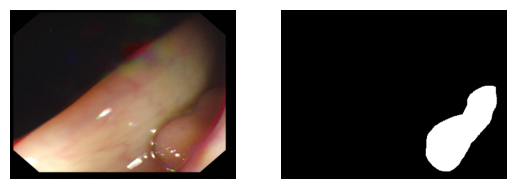

In [13]:
a = 10
plt.figure()
plt.subplot(121),plt.imshow(img_png_c[a])
plt.axis('off')
plt.subplot(122),plt.imshow(mask_c[a],'gray')
plt.axis('off')

In [12]:
import tensorflow as tf

def bce_jaccard_loss(y_true, y_pred, smooth=1e-7, alpha=0.5):
    """
    参数说明：
    - y_true: 真实标签 (shape=[batch, H, W, 1])
    - y_pred: 模型预测值 (shape=[batch, H, W, 1])
    - smooth: 防止除零的小常数
    - alpha: 平衡 BCE 和 Jaccard 的权重（默认 0.5）
    """
    # 计算二元交叉熵
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    
    # 计算 Jaccard Loss (IoU Loss)  
    y_true_f = tf.keras.backend.flatten(y_true)   # 展平为向量 [batch*H*W]
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f + y_pred_f) - intersection
    jaccard = (intersection + smooth) / (union + smooth)
    jaccard_loss = 1 - jaccard  # 将 IoU 转换为 Loss
    
    # 加权组合
    return alpha * bce + (1 - alpha) * jaccard_loss

In [13]:
def dice_score(y_true, y_pred, smooth=1e-7):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    denominator = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)
    return (2.0 * intersection + smooth) / (denominator + smooth)

In [14]:
# def iou_score(y_true, y_pred, smooth=1e-7):
#     y_true_f = tf.keras.backend.flatten(y_true)
#     y_pred_f = tf.keras.backend.flatten(y_pred)
#     intersection = tf.reduce_sum(y_true_f * y_pred_f)
#     union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
#     return (intersection + smooth) / (union + smooth)

In [15]:
model.compile(
    optimizer='Adam',
    loss=bce_jaccard_loss,  # 可替换为 iou_loss 或 bce_jaccard_loss
    metrics=[
        dice_score, 
        sm.metrics.iou_score
        # tf.keras.metrics.BinaryAccuracy()  # 可选：添加准确率指标
    ]
)

In [74]:
# # 加载模型
model.load_weights(r'E:\wujieyu\IoU best\U-net++\img\img_bestweigh_epoch_214_val_iou_0.6489.h5', by_name=True)

In [75]:
# 原图评估模型（返回 loss + metrics）
results = model.evaluate(img_png_c, mask_c, verbose=0)

In [76]:
# 打印所有指标名称和值
print("\n=== 测试结果 ===")
print(f"Loss: {results[0]:.4f}")
print(f"dice_score: {results[1]:.4f}")
print(f"iou_score: {results[2]:.4f}")


=== 测试结果 ===
Loss: 0.4726
dice_score: 0.6386
iou_score: 0.4979


In [77]:
# # 加载模型
model.load_weights(r'E:\wujieyu\IoU best\U-net++\FMM+percentile=99.5\img_FMM+percentile=99.5_bestweigh_epoch_246_val_iou_0.6419.h5', by_name=True)

In [78]:
# 新方法评估模型（返回 loss + metrics）
results1 = model.evaluate(img_png_c1, mask_c1, verbose=0)

In [79]:
# 打印所有指标名称和值
print("\n=== 测试结果 ===")
print(f"Loss: {results1[0]:.4f}")
print(f"dice_score: {results1[1]:.4f}")
print(f"iou_score: {results1[2]:.4f}")


=== 测试结果 ===
Loss: 0.4871
dice_score: 0.6711
iou_score: 0.5376


In [14]:
# # 加载模型
model.load_weights(r'E:\wujieyu\IoU best\U-net++\img\img_bestweigh_epoch_214_val_iou_0.6489.h5', by_name=True)

In [15]:
#测试mask
imgp = model.predict(img_png_c, verbose=1)

12/12 [==============================] - 17s 685ms/step


In [16]:
# # 加载模型
model.load_weights(r'E:\wujieyu\IoU best\U-net++\FMM+percentile=99.5\img_FMM+percentile=99.5_bestweigh_epoch_246_val_iou_0.6419.h5', by_name=True)

In [17]:
#测试mask
imgp1 = model.predict(img_png_c1, verbose=1)

12/12 [==============================] - 3s 235ms/step


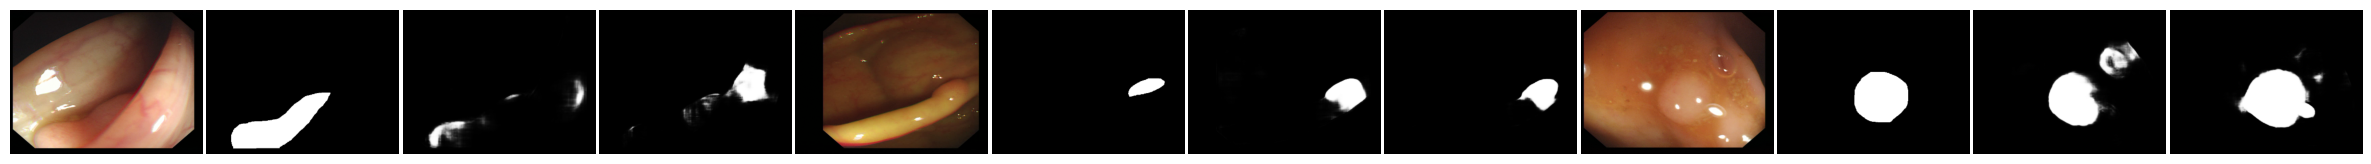

In [16]:
a, b, c = 8, 117, 311

# 设置更大的画布和紧凑布局
plt.figure(figsize=(24, 6))  # 宽度增加，高度适当调整
plt.subplots_adjust(wspace=0.02, 
                    left=0.01, 
                    right=0.99, 
                    top=0.5, 
                    bottom=0.05)  # 调整左右边距和子图间距

# 第1组子图
plt.subplot(1,12,1)
plt.imshow(img_png_c[a])
plt.axis('off')
plt.subplot(1,12,2)
plt.imshow(mask_c[a], 'gray')
plt.axis('off')
plt.subplot(1,12,3)
plt.imshow(imgp[a].reshape(288, 384), cmap='gray')
plt.axis('off')
plt.subplot(1,12,4)
plt.imshow(imgp1[a].reshape(288, 384), cmap='gray')
plt.axis('off')

# 第2组子图
plt.subplot(1,12,5)
plt.imshow(img_png_c[b])
plt.axis('off')
plt.subplot(1,12,6)
plt.imshow(mask_c[b], 'gray')
plt.axis('off')
plt.subplot(1,12,7)
plt.imshow(imgp[b].reshape(288, 384), cmap='gray')
plt.axis('off')
plt.subplot(1,12,8)
plt.imshow(imgp1[b].reshape(288, 384), cmap='gray')
plt.axis('off')
# 第3组子图
plt.subplot(1,12,9)
plt.imshow(img_png_c[c])
plt.axis('off')
plt.subplot(1,12,10)
plt.imshow(mask_c[c], 'gray')
plt.axis('off')
plt.subplot(1,12,11)
plt.imshow(imgp[c].reshape(288, 384), cmap='gray')
plt.axis('off')
plt.subplot(1,12,12)
plt.imshow(imgp1[c].reshape(288, 384), cmap='gray')
plt.axis('off')

plt.show()

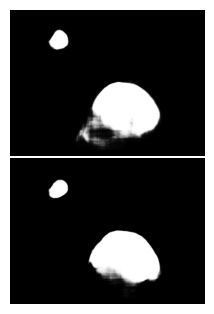

In [34]:
a = 340
# 创建紧凑画布
fig = plt.figure(figsize=(6, 3))

# 使用GridSpec控制微小边距
gs = fig.add_gridspec(2, 1, 
                     hspace=0.02,  # 行间距
                     left=0.01,    # 左边距
                     right=0.99,   # 右边距
                     top=0.99,     # 上边距
                     bottom=0.01)  # 下边距

# 添加图像子图
ax1 = fig.add_subplot(gs[0])
ax1.imshow(imgp[a].reshape(288, 384), 'gray')
ax1.axis('off')
ax1.margins(0.01)  # 图像周围微小边距

ax2 = fig.add_subplot(gs[1])
ax2.imshow(imgp1[a].reshape(288, 384), 'gray')
ax2.axis('off')
ax2.margins(0.01)  # 图像周围微小边距

# 显示紧凑布局
plt.show()